###### ### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2023 Semester 1

## Assignment 1: Music genre classification with naive Bayes


**Student ID(s):**     `PLEASE ENTER YOUR ID(S) HERE`


This iPython notebook is a template which you will use for your Assignment 1 submission.

Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook (Submitted in a separate PDF file).

**NOTE: YOU SHOULD ADD YOUR RESULTS, DIAGRAMS AND IMAGES FROM YOUR OBSERVATIONS IN THIS FILE TO YOUR REPORT (the PDF file).**

You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find.

**Adding proper comments to your code is MANDATORY. **

In [43]:
# This function should prepare the data by reading it from a file and converting it into a useful format for training and testing
import pandas as pd
import random
import math

def preprocess(filename):
    df = pd.read_csv(filename)
    # Remove the "filename" column as it is not useful for the machine learning task
    df.drop(columns=['filename'], inplace=True)
    dataset = df.values.tolist()

    # Convert the string labels to integer labels
    for row in dataset:
        if row[-1] == 'pop':
            row[-1] = 0
        else:
            row[-1] = 1

    return dataset

In [44]:
# This function should calculat prior probabilities and likelihoods from the training data and using
# them to build a naive Bayes model

def train(train_set):
    # The mean and standard deviation for each attribute under each category are calculated separately
    summaries = {}
    for i in range(len(train_set)):
        row = train_set[i]
        class_value = row[-1]
        if class_value not in summaries:
            summaries[class_value] = []
        for j in range(len(row)-1):
            if len(summaries[class_value]) == j:
                summaries[class_value].append([])
            summaries[class_value][j].append(row[j])
    for class_value, attribute_summaries in summaries.items():
        for i in range(len(attribute_summaries)):
            attribute_summaries[i] = (sum(attribute_summaries[i])/float(len(attribute_summaries[i])), 
                                      math.sqrt(sum([pow(x - attribute_summaries[i][0], 2) for x in attribute_summaries[i]]) / float(len(attribute_summaries[i]) - 1)))
    
    return summaries


In [45]:
# This function should predict classes for new items in a test dataset

# Calculate the Gaussian probability density function
def calculate_probability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

# Calculates the Gaussian probability density function for each attribute under each category
def calculate_class_probabilities(summaries, input_vector):
    probabilities = {}
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = 1
        for i in range(len(class_summaries)):
            mean, stdev = class_summaries[i]
            x = input_vector[i]
            probabilities[class_value] *= calculate_probability(x, mean, stdev)
    return probabilities

def predict(summaries, test_set):
    predictions = []
    for i in range(len(test_set)):
        probabilities = calculate_class_probabilities(summaries, test_set[i])
        best_label, best_prob = None, -1
        for class_value, probability in probabilities.items():
            if best_label is None or probability > best_prob:
                best_prob = probability
                best_label = class_value
        predictions.append(best_label)
    return predictions

In [46]:
# This function should evaliate the prediction performance by comparing your model’s class outputs to ground
# truth labels

def evaluate(test_set, predictions):
    correct = 0
    tp, fp, fn = 0, 0, 0
    for i in range(len(test_set)):
        if test_set[i][-1] == predictions[i]:
            correct += 1
            if test_set[i][-1] == 1:
                tp += 1
        else:
            if test_set[i][-1] == 1:
                fn += 1
            else:
                fp += 1
    accuracy = (correct / float(len(test_set))) * 100.0
    precision = (tp / float(tp + fp)) * 100.0
    recall = (tp / float(tp + fn)) * 100.0
    return accuracy, precision, recall

## Task 1. Pop vs. classical music classification

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

### Q1
Compute and report the accuracy, precision, and recall of your model (treat "classical" as the "positive" class).

In [47]:
# Main function
def main():
    train_fname = 'pop_vs_classical_train.csv'
    test_fname = 'pop_vs_classical_test.csv'
    train_set = preprocess(train_fname)
    test_set = preprocess(test_fname)

    summaries = train(train_set)
    predictions = predict(summaries, test_set)

    accuracy, precision, recall = evaluate(test_set, predictions)
    print('Accuracy: {:.2f}%'.format(accuracy))
    print('Precision: {:.2f}%'.format(precision))
    print('Recall: {:.2f}%'.format(recall))

if __name__ == "__main__":
    main()

Accuracy: 97.67%
Precision: 95.24%
Recall: 100.00%


### Q2
For each of the features X below, plot the probability density functions P(X|Class = pop) and P(X|Class = classical). If you had to classify pop vs. classical music using just one of these three features, which feature would you use and why? Refer to your plots to support your answer.
- spectral centroid mean
- harmony mean
- tempo

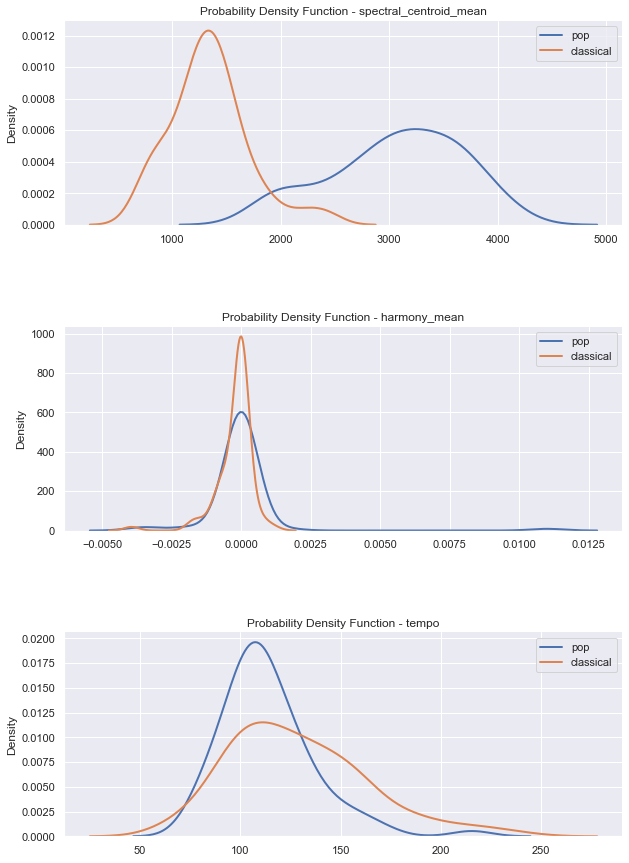

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_fname = 'pop_vs_classical_train.csv'
df_train = pd.read_csv(train_fname)

# Store data in dictionary
data = {'pop': df_train[df_train['label'] == 'pop'],
        'classical': df_train[df_train['label'] == 'classical']}

# Define features
features = ['spectral_centroid_mean', 'harmony_mean', 'tempo']

# Apply Seaborn style
sns.set()

# Create subplots
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 15))

# Loop over features and create plots
for i, feature in enumerate(features):
    for label, df in data.items():
        sns.kdeplot(df[feature], label=label, ax=axes[i], linewidth=2)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')
    axes[i].set_title('Probability Density Function - {}'.format(feature))
    axes[i].legend()
    sns.despine(ax=axes[i], top=True, right=True)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.show()


If I could only choose one of these three characteristics to classify pop and classical music, I would choose 'spectral_centroid_mean' (spectral center average). Because this characteristic reflects the distribution of the audio spectrum, the distribution of the spectrum is usually different for different types of music. Classical and popular music usually have distinct differences in terms of spectral distribution, so 'spectral_centroid_mean' can distinguish well between these two types of music.

In addition, this feature also has a certain robustness, even in the case of poor audio quality, a relatively stable feature value can be extracted. At the same time, this characteristic value can be represented and processed with lower computational and storage costs. Therefore, 'spectral_centroid_mean' is a simple but effective feature suitable for the classification task of popular and classical music.

## Task 2. 10-way music genre classification

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

### Q3
Compare the performance of the full model to a 0R baseline and a one-attribute baseline. The one-attribute baseline should be the best possible naive Bayes model which uses only a prior and a single attribute. In your write-up, explain how you implemented the 0R and one-attribute baselines.

### Q4
Train and test your model with a range of training set sizes by setting up your own train/test splits. With each split, use cross-fold validation so you can report the performance on the entire dataset (1000 items). You may use built-in functions to set up cross-validation splits. In your write-up, evaluate how model performance changes with training set size.

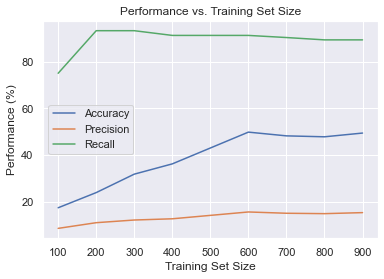

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.model_selection import KFold

def preprocess(filename):
    df = pd.read_csv(filename)
    # # Remove the "filename" column as it is not useful for the machine learning task
    df.drop(columns=['filename'], inplace=True)
    dataset = df.values.tolist()

    # Converts a category of type string to an integer
    labels = {}
    for row in dataset:
        label = row[-1]
        if label not in labels:
            labels[label] = len(labels)
        row[-1] = labels[label]

    return dataset

def train(train_set):
    # The mean and standard deviation for each attribute under each category are calculated separately
    summaries = {}
    for i in range(len(train_set)):
        row = train_set[i]
        class_value = row[-1]
        if class_value not in summaries:
            summaries[class_value] = []
        for j in range(len(row)-1):
            if len(summaries[class_value]) == j:
                summaries[class_value].append([])
            summaries[class_value][j].append(row[j])
    for class_value, attribute_summaries in summaries.items():
        for i in range(len(attribute_summaries)):
            attribute_summaries[i] = (sum(attribute_summaries[i])/float(len(attribute_summaries[i])), 
                                      math.sqrt(sum([pow(x - attribute_summaries[i][0], 2) for x in attribute_summaries[i]]) / float(len(attribute_summaries[i]) - 1)))
    
    return summaries

def calculate_probability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def calculate_class_probabilities(summaries, input_vector):
    probabilities = {}
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = 1
        for i in range(len(class_summaries)):
            mean, stdev = class_summaries[i]
            x = input_vector[i]
            probabilities[class_value] *= calculate_probability(x, mean, stdev)
    return probabilities

def predict(summaries, test_set):
    predictions = []
    for i in range(len(test_set)):
        probabilities = calculate_class_probabilities(summaries, test_set[i])
        best_label, best_prob = None, -1
        for class_value, probability in probabilities.items():
            if best_label is None or probability > best_prob:
                best_prob = probability
                best_label = class_value
        predictions.append(best_label)
    return predictions

def evaluate(test_set, predictions):
    correct = 0
    tp, fp, fn = 0, 0, 0
    for i in range(len(test_set)):
        if test_set[i][-1] == predictions[i]:
            correct += 1
            if test_set[i][-1] == 1:
                tp += 1
        else:
            if test_set[i][-1] == 1:
                fn += 1
            else:
                fp += 1
    accuracy = (correct / float(len(test_set))) * 100.0
    precision = (tp / float(tp + fp)) * 100.0
    recall = (tp / float(tp + fn)) * 100.0
    return accuracy, precision, recall

def main():
    train_fname = 'gztan_train.csv'
    test_fname = 'gztan_test.csv'
    train_set = preprocess(train_fname)
    test_set = preprocess(test_fname)
    dataset = train_set + test_set

    # Define range of training set sizes to test
    train_sizes = [100, 200, 300, 400, 600, 700, 800, 900]

    # Set up k-fold cross-validation
    num_folds = 10
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Set up lists to hold performance metrics for each training set size
    accuracies = []
    precisions = []
    recalls = []

    for train_size in train_sizes:
        # Set up lists to hold results from each fold
        fold_accuracies = []
        fold_precisions = []
        fold_recalls = []

        # Perform cross-validation
        for train_indices, test_indices in kfold.split(dataset):
            # Get the subset of the dataset for the current fold
            train_set = [dataset[i] for i in train_indices[:train_size]]
            test_set = [dataset[i] for i in test_indices]

            # Train and test the model on the current fold
            summaries = train(train_set)
            predictions = predict(summaries, test_set)
            accuracy, precision, recall = evaluate(test_set, predictions)

            # Record results for the current fold
            fold_accuracies.append(accuracy)
            fold_precisions.append(precision)
            fold_recalls.append(recall)

        # Calculate mean performance metrics across all folds for the current training set size
        mean_accuracy = np.mean(fold_accuracies)
        mean_precision = np.mean(fold_precisions)
        mean_recall = np.mean(fold_recalls)

        print(f'Training set size: {train_size}')
        print(f'Accuracy: {np.mean(mean_accuracy):.2f}%')
        print(f'Precision: {np.mean(mean_precision):.2f}%')
        print(f'Recall: {np.mean(mean_recall):.2f}%')

        # Record mean performance metrics for the current training set size
        accuracies.append(mean_accuracy)
        precisions.append(mean_precision)
        recalls.append(mean_recall)

    # Plot performance metrics as a function of training set size
    plt.plot(train_sizes, accuracies, label='Accuracy')
    plt.plot(train_sizes, precisions, label='Precision')
    plt.plot(train_sizes, recalls, label='Recall')
    plt.xlabel('Training Set Size')
    plt.ylabel('Performance (%)')
    plt.title('Performance vs. Training Set Size')
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()

### Q5
Implement a kernel density estimate (KDE) naive Bayes model and compare its performance to your Gaussian naive Bayes model. You may use built-in functions and automatic ("rule of thumb") bandwidth selectors to compute the KDE probabilities, but you should implement the naive Bayes logic yourself. You should give the parameters of the KDE implementation (namely, what bandwidth(s) you used and how they were chosen) in your write-up.

### Q6
Modify your naive Bayes model to handle missing attributes in the test data. Recall from lecture that you can handle missing attributes at test by skipping the missing attributes and computing the posterior probability from the non-missing attributes. Randomly delete some attributes from the provided test set to test how robust your model is to missing data. In your write-up, evaluate how your model's performance changes as the amount of missing data increases.